In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


In [6]:
train = pd.read_csv('train_Supervised.csv')
test = pd.read_csv('test_Supervised.csv')

In [8]:
train.head()
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
missing = train.isnull().sum().sort_values(ascending = False)
missing_percentage = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([missing, missing_percentage], axis = 1, keys = ['Total', 'Percentage'])
print(missing_data)
print(missing_percentage)
print(missing)

               Total  Percentage
PoolQC          1453    0.995205
MiscFeature     1406    0.963014
Alley           1369    0.937671
Fence           1179    0.807534
MasVnrType       872    0.597260
...              ...         ...
MoSold             0    0.000000
YrSold             0    0.000000
SaleType           0    0.000000
SaleCondition      0    0.000000
SalePrice          0    0.000000

[81 rows x 2 columns]
PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
MasVnrType       0.597260
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64
PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64


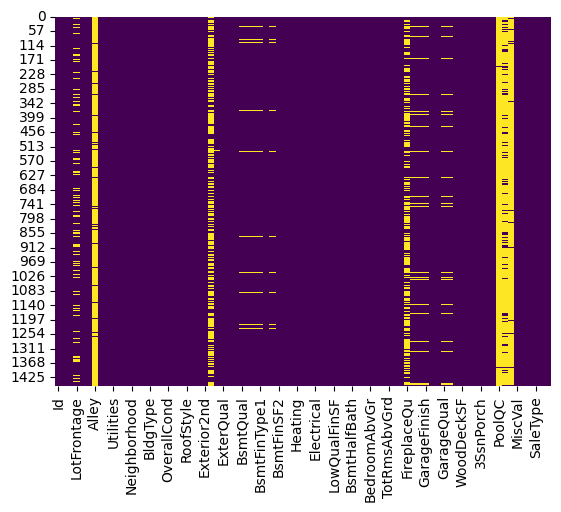

In [13]:
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.show()

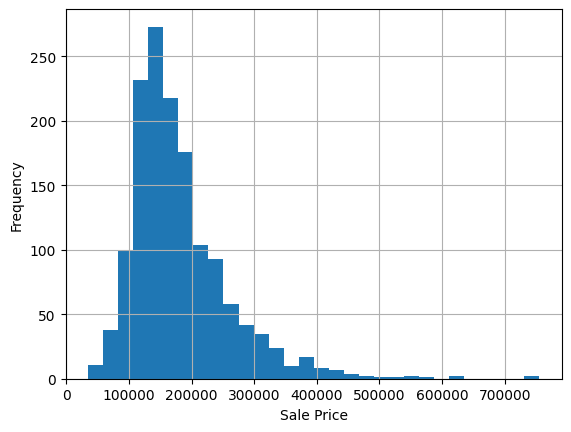

In [15]:
train['SalePrice'].hist(bins=30)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

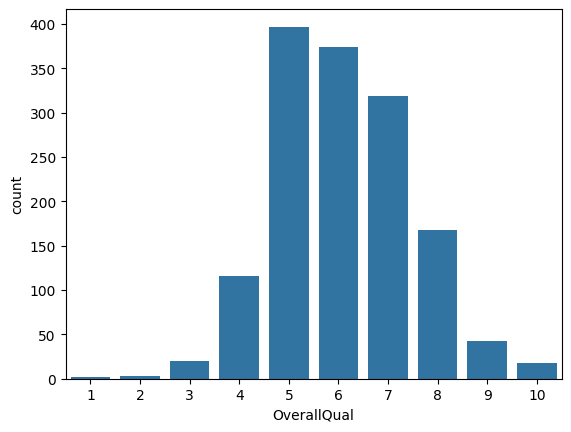

In [17]:
sns.countplot(x='OverallQual', data=train)
plt.show()

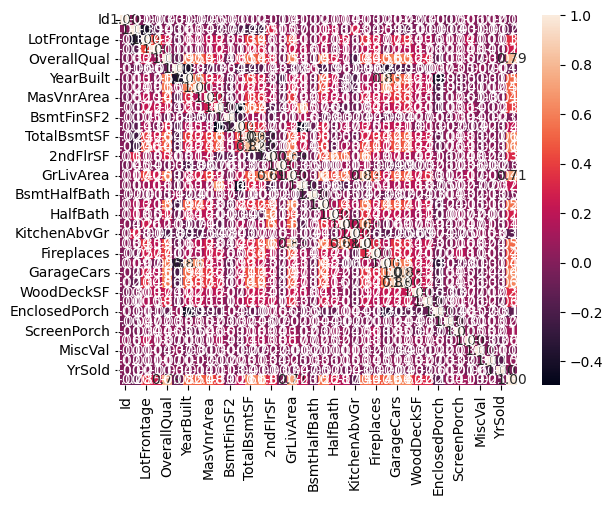

In [24]:
# Select only numeric columns
numeric_cols = train.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

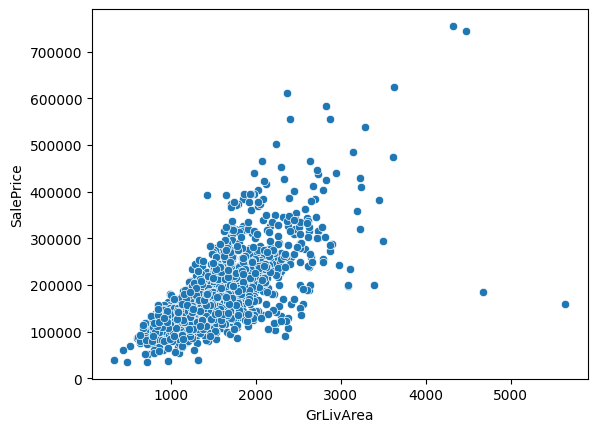

In [25]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.show()

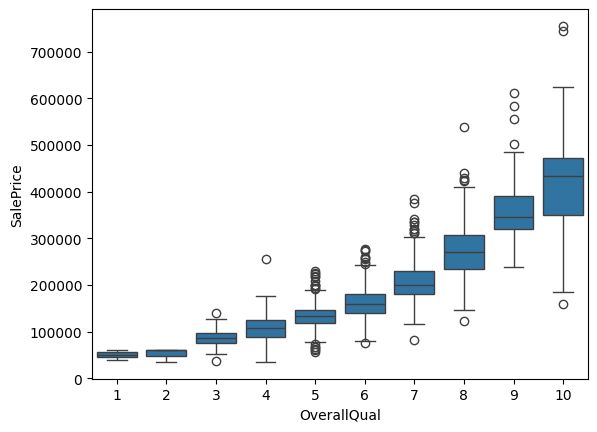

In [26]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.show()


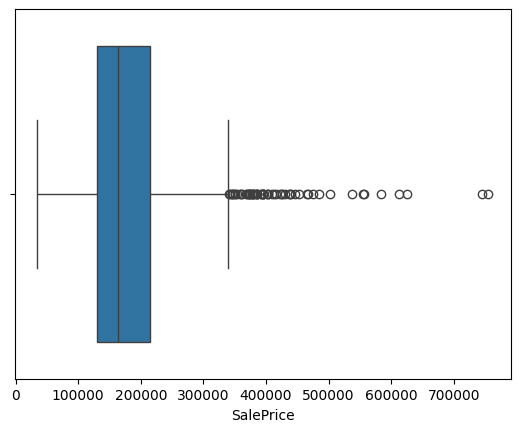

In [27]:
sns.boxplot(x=train['SalePrice'])
plt.show()

In [30]:
skewed_features = train.select_dtypes(include=['int64', 'float64']).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = skewed_features[abs(skewed_features) > 0.75]
print(skewness)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.666326
OpenPorchSF       2.361912
LotFrontage       2.160866
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
dtype: float64


In [32]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [34]:
train['PoolQC'] = train['PoolQC'].fillna('None')
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']


     Age    Salary
0   25.0   50000.0
1    NaN   60000.0
2   35.0       NaN
3  120.0  800000.0
     Age         Salary
0   25.0   50000.000000
1   60.0   60000.000000
2   35.0  303333.333333
3  120.0  800000.000000
    Age   Salary
0  25.0  50000.0
1  60.0  60000.0


C:\Users\admin\AppData\Local\Temp\ipykernel_11844\1043305114.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_11844\1043305114.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

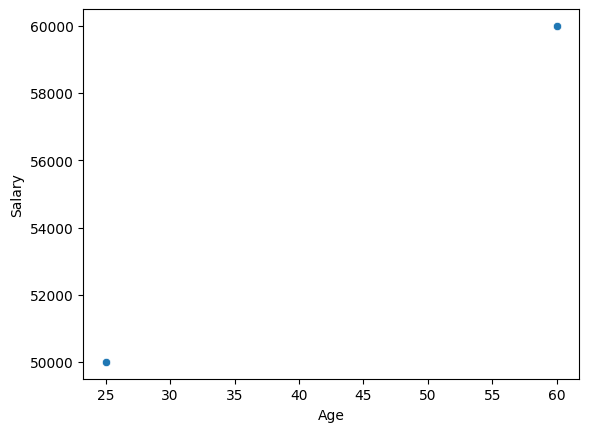